In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from PIL import Image

In [ ]:
#1 Attempt

In [4]:
df_topic=pd.read_csv('../tweeter/tweets_sentiment.csv')


In [5]:
df_topic.head()

,Unnamed: 0,Unnamed: 0.1,text,Subjectivity,Polarity,Analysis,Compound,Positive,Negative,Neutral,Compound_sentiment
0,0,0,generally masking requirement cross border tra...,0.188889,0.016667,Positive,0.5213,0.189,0.000,0.811,pos
1,1,1,u wear mask u naver happy mask,1.000000,0.800000,Positive,0.5719,0.381,0.000,0.619,pos
2,2,2,masking almost wiped flu past couple year isnt...,0.402381,0.062857,Positive,-0.7447,0.000,0.289,0.711,neg
3,3,3,ffsmy county highest rate regionive never stop...,0.000000,0.000000,Neutral,0.1695,0.132,0.000,0.868,pos
4,4,4,doublevaxxed covid taking another vaccine stil...,0.000000,0.000000,Neutral,0.0000,0.000,0.000,1.000,pos


In [91]:
df_topic_filtered = df_topic[['text','Compound','Compound_sentiment']]

In [92]:
X_tr, X_hold = train_test_split(df_topic_filtered, test_size = 0.25, random_state =33)

In [93]:
vectorizer_topic_tf = CountVectorizer(token_pattern = r"[a-z]+", ngram_range=(1,1), stop_words = 'english', min_df=50, max_df=0.75)

In [94]:
X_tr.text

64651    engage anyone garland come parent masking b sc...
67500    never mandate need weapon board mask mandate y...
33726    still masking rare occasion even leave home st...
54899    restarted mine couple week ago step tradition ...
39460    idk yall keep going back forth still wear mask...
                               ...                        
65593    seriously wondering possible may never fly one...
27849     good masking lolll say come capricorn manuscript
578      lol left actually agrees truth dont want antma...
67975    know published pandemic plan updated 19 based ...
23572    blom havent church since started following mas...
Name: text, Length: 66986, dtype: object

In [95]:
topic_tf_vectors = vectorizer_topic_tf.fit_transform(X_tr.text)

In [96]:
feature_names = vectorizer_topic_tf.get_feature_names()
feature_names

['ability',
 'able',
 'abortion',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'abuse',
 'ac',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'according',
 'account',
 'acknowledge',
 'act',
 'acting',
 'action',
 'active',
 'actively',
 'activity',
 'actor',
 'actual',
 'actually',
 'ad',
 'ada',
 'adam',
 'add',
 'added',
 'addition',
 'additional',
 'address',
 'adhd',
 'admin',
 'administration',
 'admit',
 'admits',
 'admitted',
 'adult',
 'advice',
 'advocate',
 'advocating',
 'aerosol',
 'af',
 'affect',
 'affected',
 'afford',
 'afraid',
 'age',
 'agency',
 'agenda',
 'ago',
 'agree',
 'agreed',
 'ah',
 'ahead',
 'aid',
 'aint',
 'air',
 'airborne',
 'airline',
 'airplane',
 'airport',
 'aka',
 'al',
 'alameda',
 'alberta',
 'alert',
 'alien',
 'alive',
 'allergy',
 'allow',
 'allowed',
 'allowing',
 'amazing',
 'amendment',
 'america',
 'american',
 'amid',
 'analysis',
 'andor',
 'ang',
 'angeles',
 'anger',
 'angry',
 'announced',
 'announcement',
 'annoying',
 'answe

In [97]:
lda = decomposition.LatentDirichletAllocation(n_components=1, max_iter=3, learning_method = 'online',learning_offset =50, random_state =33)


In [100]:
W1 = lda.fit_transform(topic_tf_vectors)


In [17]:
H1 = lda.components_

In [102]:
lda.perplexity(topic_tf_vectors)

676.8977484026825

In [103]:
num_words=15
vocab = np.array(vectorizer_topic_tf.get_feature_names())
top_words = lambda t:[vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words=([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [104]:
topics

['mask wear dont people wearing want right n need told flight arent wont boosted asked',
 'masking look yes tape gun death freedom old like lol yeah body antimask w safety',
 'mask wear im people covid masking dont like day time work think know got going',
 'masking face like mask people wear love far make think thats way stopped guess thing',
 'mandate mask covid case public indoor county indoors friend store end world rule new great',
 'masking school kid child covid doesnt year health vaccine month stop risk state pandemic infection']

In [37]:
#nb_vect = CountVectorizer(token_pattern = r"[a-z]+", ngram_range=(1,1), min_df=50).fit(df_topic_filtered['text'])

In [ ]:
vectorizer_tf= CountVectorizer(token_pattern = r"[a-z]+", ngram_range=(1,1), stop_words = 'english', min_df=50, max_df=0.75)

In [38]:
vectorizer_tf

CountVectorizer(min_df=50, stop_words='english', token_pattern='[a-z]+')

In [47]:
df_topic_filtered['text'] = df_topic_filtered['text'].astype(str)

/tmp/ipykernel_106954/137695412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_topic_filtered['text'] = df_topic_filtered['text'].astype(str)


In [48]:
X = df_topic_filtered['text']
y = df_topic_filtered['Compound_sentiment']

In [49]:
X = vectorizer_tf.fit_transform(X)

In [50]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
nb = MultinomialNB()
#nb.fit(X_train, y_train)

In [51]:
nb_pred = nb.fit(X_train, y_train).predict(X_test)

In [52]:
nb_accuracy = np.mean(y_test==nb_pred)
nb_accuracy

0.7997447265887411

In [54]:
nb.feature_log_prob_

array([[-9.9031284 , -9.81611702, -7.51353193, ..., -7.47270993,
        -9.81611702, -9.81611702],
       [-9.4718485 , -8.66091828, -7.42415566, ..., -7.70114244,
        -9.24870495, -9.31769782]])

In [55]:
#P(word| )
positive_probs = nb.feature_log_prob_[0, :]

In [56]:
negative_probs = nb.feature_log_prob_[1, :]

In [57]:
deltas = positive_probs-negative_probs

In [68]:
mmm = ((np.exp(1)**negative_probs)/(np.exp(1)**positive_probs))>2

In [69]:
for w in np.array(feature_names)[mmm]:
    print(w)

ability
ada
admits
agree
ahead
alameda
alert
alive
amazing
amid
ang
angeles
animal
announcement
apartment
appeal
appreciate
art
ashawndabney
attending
audience
available
awesome
bag
bay
beautiful
beauty
benefit
berkeley
best
better
blanket
boost
boosted
bts
california
campus
card
cat
category
celebrate
ceremony
checking
citing
clean
clear
coffee
collection
college
comfortable
como
confirmed
cool
coronavirus
credit
crossed
cute
dance
dc
dear
deco
definitely
del
department
depending
depends
destination
di
dining
disposable
dm
dom
dream
e
easier
easy
editing
effective
effectively
el
en
encourage
encouraged
encouraging
enhypen
enjoy
ensure
excellent
excited
facemasks
favor
favorite
feature
file
francisco
free
freedom
frequently
friend
fun
germany
ggu
glad
good
goodness
google
grateful
great
guest
guidance
ha
haha
hall
hand
happy
hay
heart
helpful
hepa
hero
hi
highlight
highquality
holder
holiday
honest
honestly
hope
hoping
hub
hug
hydrated
image
improve
increased
independent
indoor
industr

In [80]:
print("\nFeatures that are most indicative of positive tweet:\n")
for i in np.argsort(deltas)[:50]:
    print(feature_names[i])


Features that are most indicative of positive tweet:

maskingtape
hydrated
editing
ada
deco
ha
beautiful
highlight
si
lo
safely
holder
washi
mortgage
que
bts
pad
amid
solo
pero
grateful
wonderful
para
berkeley
kit
beauty
dm
te
philadelphia
tape
encouraged
preserving
excellent
comfortable
super
dom
smiling
relaxed
mi
por
los
awesome
oakland
wow
hoping
como
love
hi
great
vega


In [66]:
print("\nFeatures that are most indicative of negative tweet:\n")
for i in np.argsort(-deltas)[:30]:
    print(feature_names[i])


Features that are most indicative of negative tweet:

suicide
fatality
outrage
coward
chaos
evil
fraud
mongering
cruel
abuse
killing
killed
disaster
blaming
damaging
destroyed
destroys
lying
death
died
violation
fascist
hell
pathetic
conspiracy
violent
refusing
murdered
crisis
unhealthy


In [72]:
words_list = []
for w in np.array(feature_names)[mmm]:
        words_list.append(w)
words_list

['ability',
 'ada',
 'admits',
 'agree',
 'ahead',
 'alameda',
 'alert',
 'alive',
 'amazing',
 'amid',
 'ang',
 'angeles',
 'animal',
 'announcement',
 'apartment',
 'appeal',
 'appreciate',
 'art',
 'ashawndabney',
 'attending',
 'audience',
 'available',
 'awesome',
 'bag',
 'bay',
 'beautiful',
 'beauty',
 'benefit',
 'berkeley',
 'best',
 'better',
 'blanket',
 'boost',
 'boosted',
 'bts',
 'california',
 'campus',
 'card',
 'cat',
 'category',
 'celebrate',
 'ceremony',
 'checking',
 'citing',
 'clean',
 'clear',
 'coffee',
 'collection',
 'college',
 'comfortable',
 'como',
 'confirmed',
 'cool',
 'coronavirus',
 'credit',
 'crossed',
 'cute',
 'dance',
 'dc',
 'dear',
 'deco',
 'definitely',
 'del',
 'department',
 'depending',
 'depends',
 'destination',
 'di',
 'dining',
 'disposable',
 'dm',
 'dom',
 'dream',
 'e',
 'easier',
 'easy',
 'editing',
 'effective',
 'effectively',
 'el',
 'en',
 'encourage',
 'encouraged',
 'encouraging',
 'enhypen',
 'enjoy',
 'ensure',
 'excell

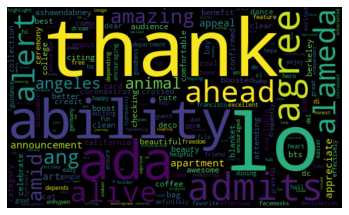

In [78]:
words = ' '.join([w for w in words_list])

wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(words)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

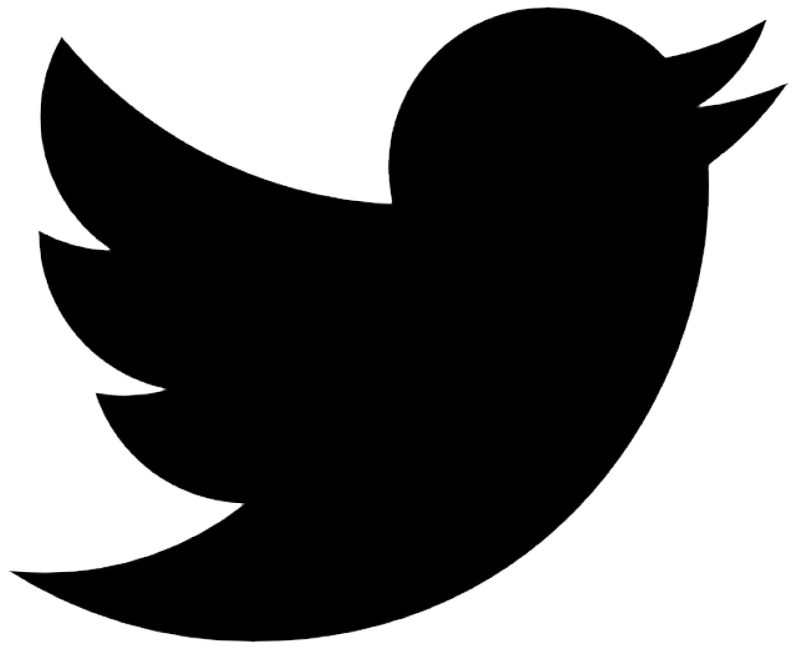

In [76]:
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))
    
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

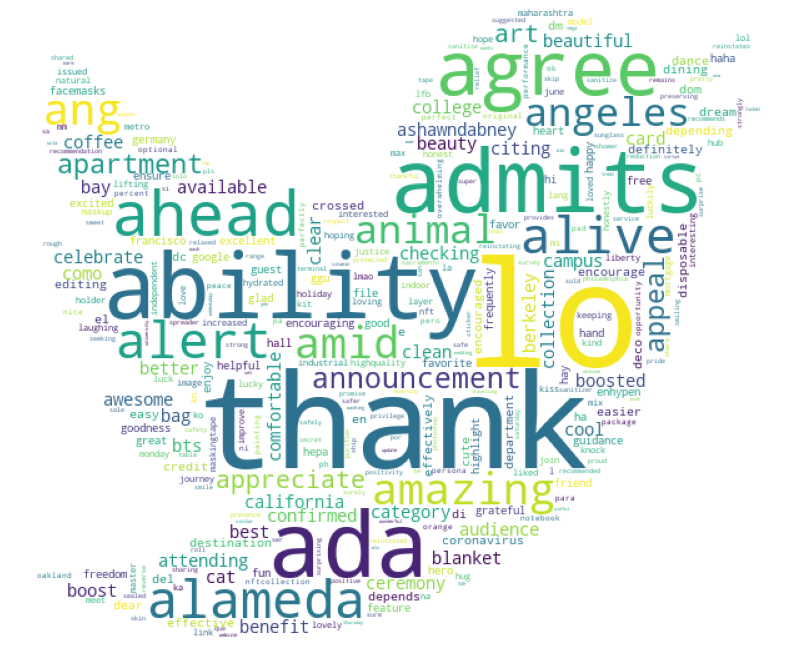

In [79]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(words)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc)
plt.axis('off')
plt.show()

NameError: name 'ticklabs' is not defined

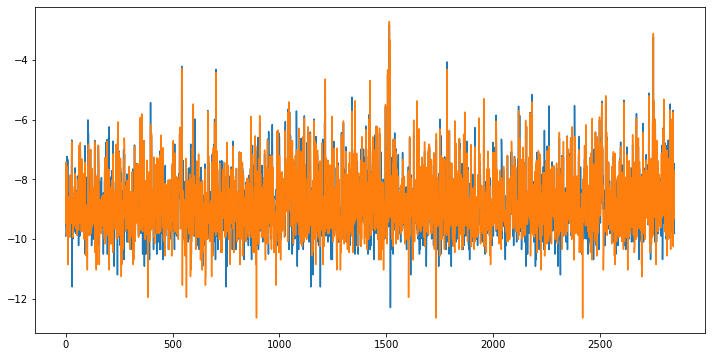

In [81]:
log_probs = nb.feature_log_prob_
ticklabls = feature_names

plt.figure(figsize = (12, 6))
plt.plot(log_probs.T)
plt.xticks(range(len(feature_names)),
          [f[10:] for f in ticklabs],
          rotation ='vertical')
plt.show()